# Regression problem on real-estate dataset 

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Get the data and do exploratory data analysis

In [2]:
data =  pd.read_csv(r'C:\Users\pavanreddy\Real estate.csv')
data.info()
describe = data.describe()
corr = data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
corr

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [5]:
describe

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Correlation gives the relation between varibales . Hence , we found somewhat good info from corr and heatmap

<AxesSubplot:>

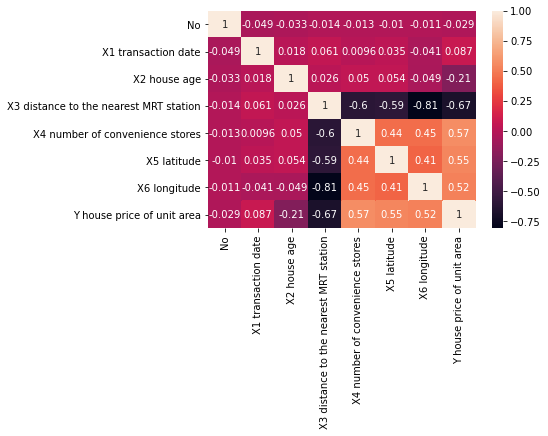

In [13]:
sns.heatmap(data.corr(), annot= True)

Seperating the independent and dependent variables and neglecting 1st column because its just a serial number giving no valuable information

In [7]:
X = data.iloc[: , 1:-1].values
y = data.iloc[:,-1].values

Splitting the data into training and testing data sets

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X ,y, test_size = 0.2)

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train , y_train)
y_pred = linreg.predict(x_test)
comparison = pd.DataFrame()
comparison['y_test'] = y_test
comparison['y_pred'] = y_pred

Verifying the model performance.

In [12]:
from sklearn.metrics import r2_score , mean_squared_error
print("mean square error is: ", mean_squared_error(y_test , y_pred))
print('r2 score: ', r2_score(y_test , y_pred))
print(" score" , linreg.score(x_test , y_test))
print("prediction for unknown value: " , linreg.predict(np.array([[2012.92,32,84.8788,10,24.983,121.54]])))

mean square error is:  59.52773874413334
r2 score:  0.6127601631794446
 score 0.6127601631794446
prediction for unknown value:  [47.118756]


We can plot lot of regression plots between target and independent. Below iam taking one as example.

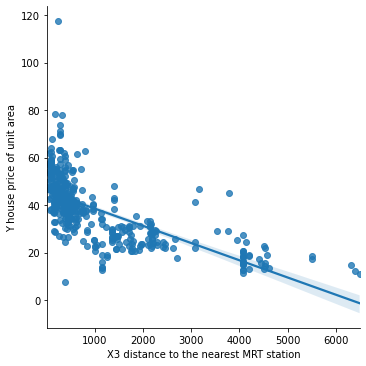

In [14]:
sns.lmplot(x= 'X3 distance to the nearest MRT station' , y ='Y house price of unit area',data = data)